# Logistic Regression

## Import libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib
import warnings

In [42]:
df=pd.read_csv("D:\\titanic.csv",)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data preprocessing

In [43]:
#Data cleaning
df.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)

In [44]:
#checking null value
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [ ]:
#fill null values
df['Age'].fillna(df.Age.mean(),inplace=True)

In [46]:
#Drop the null values
df.dropna(inplace=True)

In [48]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452
std,0.486260,0.834700,12.968366,1.103705,0.806761
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


## Exploratory Data Analysis

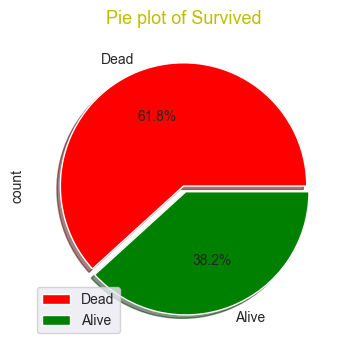

In [50]:
plt.figure(figsize=(4,4))
colors=sns.color_palette('pastel')
df.Survived.value_counts().plot.pie(labels=['Dead','Alive'],colors=['r','g'],explode=[0,0.05],autopct='%1.1f%%',shadow=True)
plt.title("Pie plot of Survived",size=13,c='y')
plt.legend(loc=3)
plt.show()

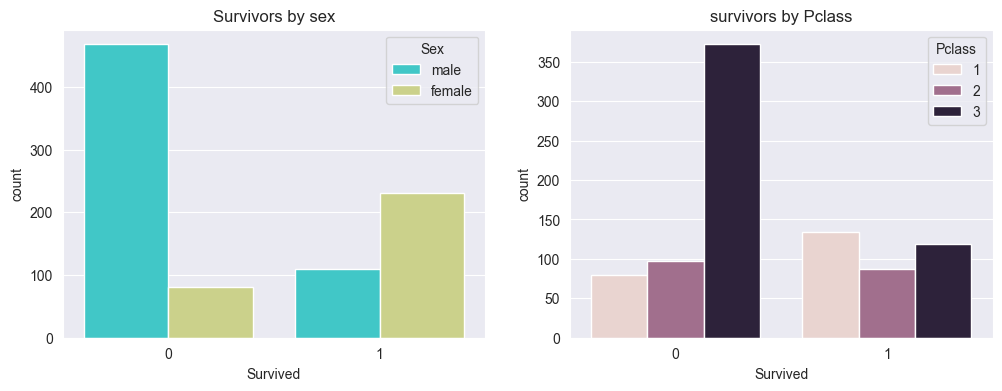

In [51]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(1,2,figsize=(12,4))
sns.countplot(data=df,x="Survived",hue="Sex",palette='rainbow',ax=axes[0])
axes[0].set_title('Survivors by sex')
sns.countplot(data=df,x="Survived",hue="Pclass",ax=axes[1])
axes[1].set_title('survivors by Pclass')
plt.show()

## Feature engineering

In [52]:
#perform One-hot-encoding
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True,dtype=np.int64)

## Data split in train/test  

In [53]:
y=df.Survived
x=df.drop(['Survived'],axis=1)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
print(x_train.shape)
print(x_test.shape)

(711, 7)
(178, 7)


## Model building 

In [56]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation

In [62]:
y_predict=model.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
print(f'Accuracy_score={accuracy*100:.2f}%') 

Accuracy_score=78.09%


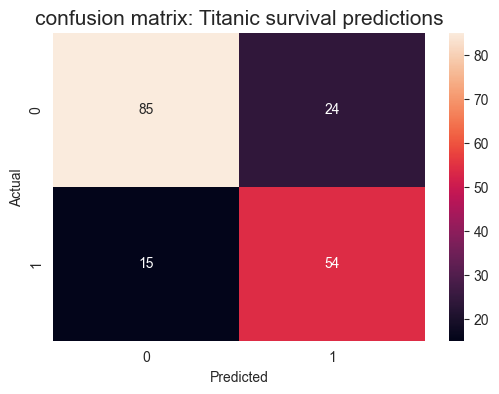

In [63]:
#confusion matrix
con=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(con,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix: Titanic survival predictions",size=15)
plt.show()

In [64]:
#classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



## Save the Model

In [66]:
joblib.dump(model,'titanic_logistic_model.pkl')

['titanic_logistic_model.pkl']